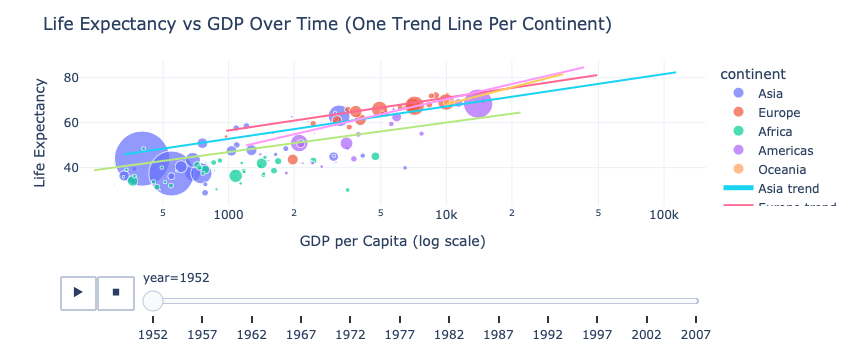

In [7]:
import plotly.express as px
import plotly.graph_objs as go
import pandas as pd
from plotly.subplots import make_subplots
import numpy as np
!pip install scikit-learn
from sklearn.linear_model import LinearRegression
# Loading the dataset
from gapminder import gapminder

# Create the initial scatter plot using Plotly Express
fig = px.scatter(gapminder,
                 x="gdpPercap",
                 y="lifeExp",
                 color="continent",
                 size="pop",
                 animation_frame="year",
                 hover_name="country",
                 log_x=True,
                 size_max=60)

# Create one trend line per continent
continents = gapminder['continent'].unique()

for continent in continents:
    # Filter data for each continent
    df_continent = gapminder[gapminder['continent'] == continent]
    
    # Fit a linear regression model
    X = np.log10(df_continent['gdpPercap']).values.reshape(-1, 1)  # log-scale the GDP per capita
    y = df_continent['lifeExp'].values
    model = LinearRegression().fit(X, y)
    
    # Predict values to create a trend line
    x_range = np.linspace(X.min(), X.max(), 100)
    y_pred = model.predict(x_range.reshape(-1, 1))
    
    # Add the trend line to the plot
    fig.add_trace(go.Scatter(
        x=10**x_range,  # Reverse the log transformation for plotting
        y=y_pred,
        mode='lines',
        line=dict(dash='solid'),
        name=f"{continent} trend",
        showlegend=True
    ))

# Customize the layout
fig.update_layout(
    title="Life Expectancy vs GDP Over Time (One Trend Line Per Continent)",
    xaxis_title="GDP per Capita (log scale)",
    yaxis_title="Life Expectancy",
    template="plotly_white",
    hovermode="closest"
)

# Display the plot
fig.show()



      